In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [57]:
recipes_df = pd.read_csv('./data/recipes5k_df.csv')

In [59]:
recipes_df['RecipeIngredientParts'][0]

'[\'"sugar"\', \' "lemons\', \' rind of"\', \' "lemon\', \' zest of"\', \' "fresh water"\', \' "fresh lemon juice"\']'

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
recipes_df = recipes_df.drop(columns = 'Unnamed: 0')

In [51]:
recipes_df.head(2)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,calories_per_serving
0,40,Best Lemonade,5.0,30,35.0,Beverages,"['""Low Protein""', ' ""Low Cholesterol""', ' ""Hea...","['""1 1/2""', ' ""1""', ' NA', ' ""1 1/2""', ' NA', ...","['""sugar""', ' ""lemons', ' rind of""', ' ""lemon'...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"['""Into a 1 quart Jar with tight fitting lid',...",77.775
1,42,Cabbage Soup,30.0,20,50.0,Vegetable,"['""Low Protein""', ' ""Vegan""', ' ""Low Cholester...","['""46""', ' ""4""', ' ""1""', ' ""2""', ' ""1""']","['""plain tomato juice""', ' ""cabbage""', ' ""onio...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"['""Mix everything together and bring to a boil...",25.900


<AxesSubplot:>

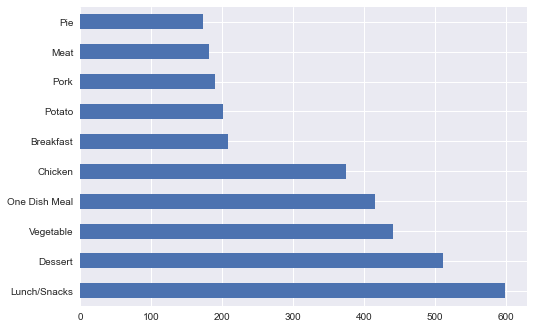

In [52]:
recipes_df['RecipeCategory'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

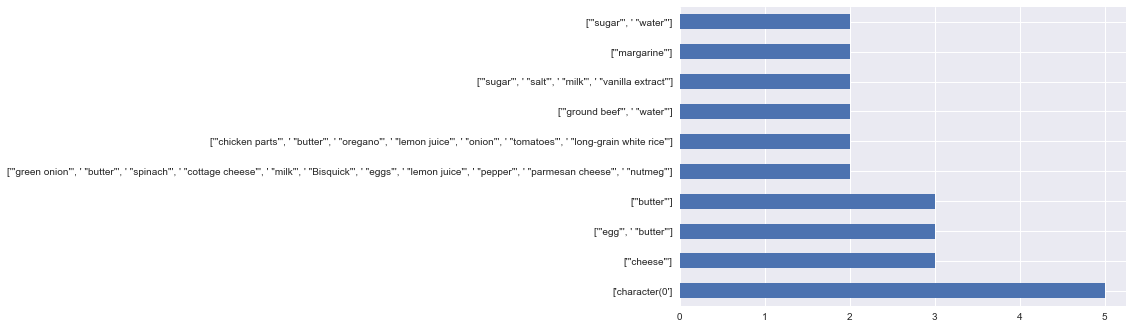

In [53]:
recipes_df['RecipeIngredientParts'].value_counts().head(10).plot(kind='barh')

In [54]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [55]:
to_1D(recipes_df['RecipeIngredientParts']).value_counts()

     104264
'     88009
"     87700
e     53037
,     38471
      ...  
8         5
(         5
9         2
®         1
Q         1
Length: 67, dtype: int64

In [56]:
recipes_df['RecipeIngredientParts'][2]

'[\'"chicken"\', \' "butter"\', \' "flour"\', \' "milk"\', \' "celery"\', \' "button mushrooms"\', \' "green pepper"\', \' "canned pimiento"\', \' "salt"\', \' "black pepper"\', \' "Worcestershire sauce"\', \' "parsley"\']'